
<h3> Importing necessary libraries </h3>

In [ ]:
from IPython.display import display_html
def restartkernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
    
restartkernel()

In [5]:
import qlayers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

2023-04-20 12:41:15.722470: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1. <Quantum Keras Layer: func=qnode0>


<h3> Instantiating and visualizing the Moons dataset from Scikit-Learn </h3>

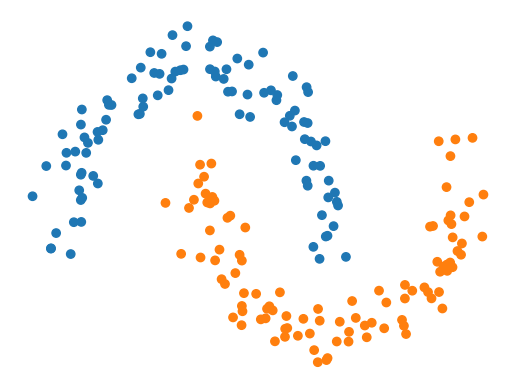

In [6]:
# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

X, y = make_moons(n_samples=200, noise=0.1)
y_hot = tf.keras.utils.to_categorical(y, num_classes=2)  # one-hot encoded labels

c = ["#1f77b4" if y_ == 0 else "#ff7f0e" for y_ in y]  # colours for each class
plt.axis("off")
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.show()

<h3> Creating model with classical and quantum layers </h3> 

In [8]:
tf.keras.backend.set_floatx('float64')

clayer_1 = tf.keras.layers.Dense(4)
qlayer_1 = qlayers.list_of_qlayers[0]
#qlayer_2 = qlayers.list_of_qlayers[1]
clayer_2 = tf.keras.layers.Dense(2, activation="softmax")

In [10]:
# construct the model
inputs = tf.keras.Input(shape=(2,))
x = clayer_1(inputs)
x_1, x_2 = tf.split(x, 2, axis=1)
x_1 = qlayer_1(x_1)
#x_2 = qlayer_2(x_2)
x = tf.concat([x_1, x_2], axis=1)
outputs = clayer_2(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [11]:
opt = tf.keras.optimizers.SGD(learning_rate=0.2)
model.compile(opt, loss="mae", metrics=["accuracy"])

fitting = model.fit(X, y_hot, epochs=6, batch_size=5, validation_split=0.25, verbose=1)

Epoch 1/6
30/30 [==============================] - 5s 177ms/step - loss: 0.3571 - accuracy: 0.7200 - val_loss: 0.2174 - val_accuracy: 0.8400
Epoch 2/6
30/30 [==============================] - 5s 170ms/step - loss: 0.2057 - accuracy: 0.8200 - val_loss: 0.1839 - val_accuracy: 0.8400
Epoch 3/6
30/30 [==============================] - 5s 171ms/step - loss: 0.1772 - accuracy: 0.8333 - val_loss: 0.1748 - val_accuracy: 0.8200
Epoch 4/6
30/30 [==============================] - 5s 178ms/step - loss: 0.1647 - accuracy: 0.8600 - val_loss: 0.1696 - val_accuracy: 0.8200
Epoch 5/6
30/30 [==============================] - 5s 176ms/step - loss: 0.1545 - accuracy: 0.8733 - val_loss: 0.1663 - val_accuracy: 0.8400
Epoch 6/6
30/30 [==============================] - 5s 169ms/step - loss: 0.1481 - accuracy: 0.8600 - val_loss: 0.1671 - val_accuracy: 0.8200


In [12]:
qlayer_1.get_weights()

[array([-0.26182101, -0.15357309, -0.82073313, -0.09435676])]

In [14]:
#qlayer_2.get_weights()

<h3> Result Plots </h3>

In [15]:
def plot_history(history, mode, model_number):
    if mode == "ACC":
        mode = 'accuracy'
    elif mode == "LOSS":
        mode = 'loss'
    else:
        print("ERROR")
        
    plt.plot(history.history[f"{mode}"])
    plt.plot(history.history[f"val_{mode}"])
    plt.title(f"model{model_number} {mode}")
    plt.ylabel(f'{mode}')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

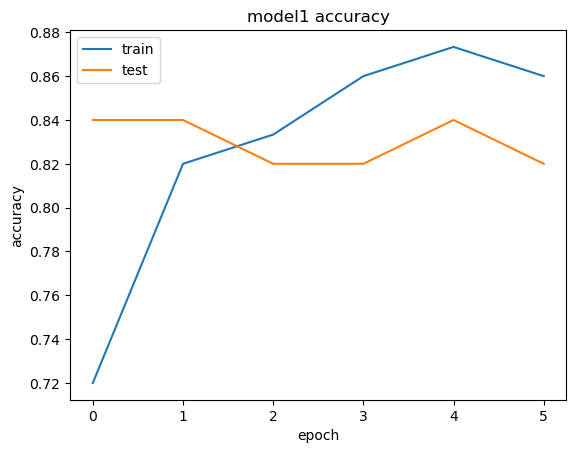

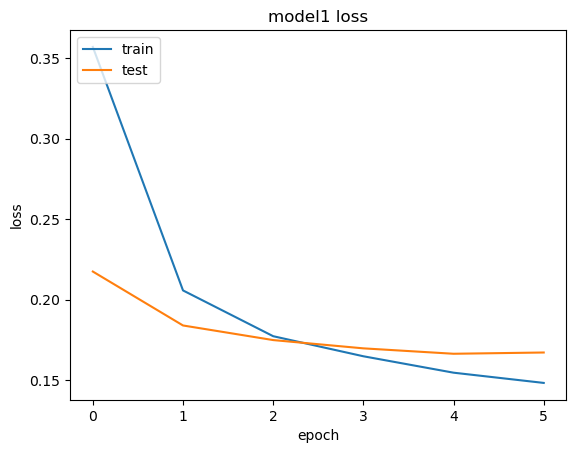

In [16]:
plot_history(fitting, "ACC", 1)
plot_history(fitting, "LOSS", 1)